In [1]:
import pandas as pd

In [2]:
# Quick utility to embed the videos below
from IPython.display import YouTubeVideo
def embed_video(index, playlist='PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ'):
    return YouTubeVideo('', index=index - 1, list=playlist, width=600, height=350)

In [3]:
embed_video(1)

In [4]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [5]:
from urllib.request import urlretrieve # this looks interesting
urlretrieve(URL, 'Fremont.csv')
!head Fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
08/01/2022 12:00:00 AM,23,7,16
08/01/2022 01:00:00 AM,12,5,7
08/01/2022 02:00:00 AM,3,0,3
08/01/2022 03:00:00 AM,5,2,3
08/01/2022 04:00:00 AM,10,2,8
08/01/2022 05:00:00 AM,27,5,22
08/01/2022 06:00:00 AM,100,43,57
08/01/2022 07:00:00 AM,219,90,129
08/01/2022 08:00:00 AM,335,143,192


In [7]:
## using pandas to read the file
df = pd.read_csv('Fremont.csv', index_col = 'Date', parse_dates = True)      
df.drop(columns = ['Fremont Bridge Total'], inplace = True)                                                        
df.head()    

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2022-08-01 00:00:00,7.0,16.0
2022-08-01 01:00:00,5.0,7.0
2022-08-01 02:00:00,0.0,3.0
2022-08-01 03:00:00,2.0,3.0
2022-08-01 04:00:00,2.0,8.0


In [10]:
## plotting the data
import matplotlib.pylab as plt
%matplotlib inline             

<AxesSubplot:xlabel='Date'>

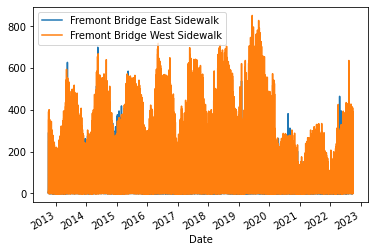

In [9]:
df.plot() 

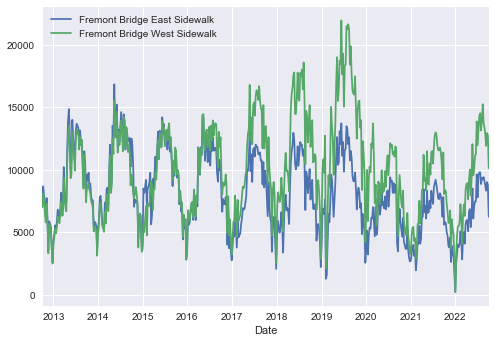

In [11]:
## lets change the style of the plot
plt.style.use('seaborn')
df.resample('W').sum().plot() 
df.columns = ['East', "west"]  

<AxesSubplot:xlabel='Date'>

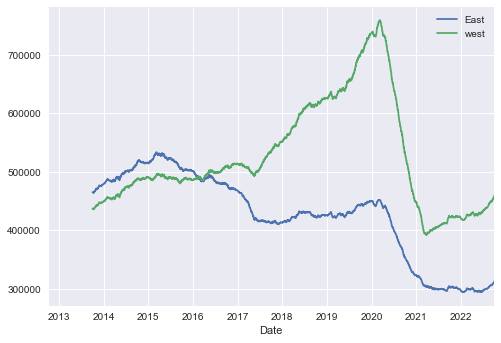

In [12]:
df.resample('D').sum().rolling(365).sum().plot() 

(0.0, 1256022.05)

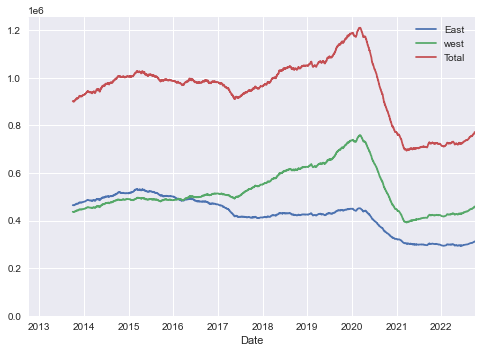

In [13]:
## plotting the total can help understand better
df['Total'] = df['East'] + df['west']  ## adding this graph this simple is so fancy (:
ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None) 

<AxesSubplot:xlabel='time'>

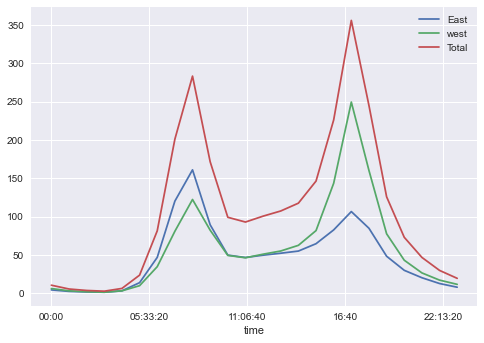

In [14]:
df.groupby(df.index.time).mean().plot() 

In [16]:
pivoted = df.pivot_table('Total', index = df.index.time, columns = df.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


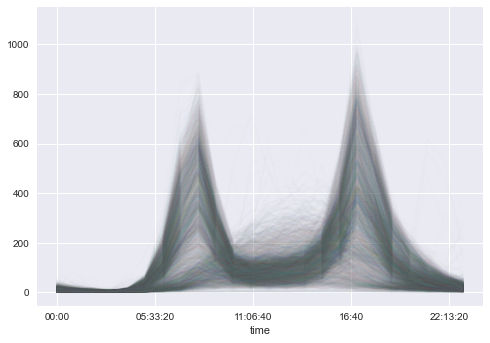

In [17]:
pivoted.plot(legend = False, alpha = 0.01);pc